In [1]:
import pandas as pd
import numpy as np

In [2]:
df_aptos = pd.read_csv('caracteristicas_aptos.csv')
df_fotos = pd.read_csv('fotos.csv')

C:\Users\thais\AppData\Local\Temp\ipykernel_34296\3163053140.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aptos = pd.read_csv('caracteristicas_aptos.csv')


In [4]:
df_aptos.head()

,id,area,price,bedrooms,balcony_type,parking_spots,unit_is_parking_space_fixed,living_room_view_is_blocked,solar_orientation_room,solar_orientation_master_suite,...,unpublish_reason,sold_at,polygon_name,building_id,unit_id,full_name,number,city,latitude,longitude
0,123izj4,179,1650000.0,3,simple,1,NaN,False,NaN,NaN,...,NaN,NaN,Sp Jardins,1003.0,132912.0,Avenida Paulista,1195,São Paulo,-23.564069,-46.653563
1,1uuanll,236,2300000.0,3,none,1,NaN,NaN,NaN,NaN,...,UNIT_UNAVAILABLE_FOR_SALE,NaN,Sp Jardins,1003.0,132992.0,Avenida Paulista,1195,São Paulo,-23.564069,-46.653563
2,1g10s8j,227,3200000.0,4,simple,1,NaN,False,NaN,NaN,...,NaN,2022-01-25T20:41:44.000Z,Sp Jardins,1003.0,133018.0,Avenida Paulista,1195,São Paulo,-23.564069,-46.653563
3,k8oj6e,49,650000.0,1,none,1,NaN,False,NaN,NaN,...,NaN,NaN,Sp Jardins,1976.0,133128.0,Alameda Campinas,474,São Paulo,-23.565628,-46.653224
4,58un1p,69,730000.0,2,simple,0,NaN,False,NaN,NaN,...,UNIT_RENTED,NaN,Sp Jardins,1978.0,133251.0,Rua Pamplona,860,São Paulo,-23.565277,-46.655399


In [5]:
df_aptos.columns

Index(['id', 'area', 'price', 'bedrooms', 'balcony_type', 'parking_spots',
       'unit_is_parking_space_fixed', 'living_room_view_is_blocked',
       'solar_orientation_room', 'solar_orientation_master_suite', 'floor',
       'built_year', 'valor_condominio', 'subway_shortest_distance',
       'marketplace_ou_proprio', 'created_at', 'status', 'is_published',
       'churn_at', 'last_unpublished_at', 'unpublish_reason', 'sold_at',
       'polygon_name', 'building_id', 'unit_id', 'full_name', 'number', 'city',
       'latitude', 'longitude'],
      dtype='object')

In [6]:
df_aptos = df_aptos[['id', 'area', 'price', 'bedrooms', 'parking_spots', 'living_room_view_is_blocked', 'floor',
       'built_year', 'valor_condominio', 'subway_shortest_distance',
       'created_at', 'status', 'is_published','last_unpublished_at', 'unpublish_reason', 'sold_at',
       'polygon_name', 'building_id', 'unit_id', 'city',
       'latitude', 'longitude']]

In [7]:
df_aptos.rename(columns={'price':'preco','bedrooms':'quartos','parking_spots':'vagasGaragem',
                         'living_room_view_is_blocked':'vistaSalaBloqueada', 'floor':'andar','built_year':'anoConstrucao',
                         'subway_shortest_distance':'menorDistanciaMetro','created_at':'criadoEm','is_published':'publicado',
                         'last_unpublished_at':'despublicadoEm','unpublish_reason':'motivoDespublicacao','sold_at':'vendidoEm',
                         'polygon_name':'regiao','building_id':'idPredio','unit_id':'idApartamento','city':'cidade'
                        }, inplace=True)
df_aptos.head()

,id,area,preco,quartos,vagasGaragem,vistaSalaBloqueada,andar,anoConstrucao,valor_condominio,menorDistanciaMetro,...,publicado,despublicadoEm,motivoDespublicacao,vendidoEm,regiao,idPredio,idApartamento,cidade,latitude,longitude
0,123izj4,179,1650000.0,3,1,False,2,1962.0,2200.0,133.000,...,True,NaN,NaN,NaN,Sp Jardins,1003.0,132912.0,São Paulo,-23.564069,-46.653563
1,1uuanll,236,2300000.0,3,1,NaN,17,1962.0,3200.0,133.000,...,True,2022-07-12T11:10:30.000Z,UNIT_UNAVAILABLE_FOR_SALE,NaN,Sp Jardins,1003.0,132992.0,São Paulo,-23.564069,-46.653563
2,1g10s8j,227,3200000.0,4,1,False,24,1962.0,3100.0,132.822,...,True,NaN,NaN,2022-01-25T20:41:44.000Z,Sp Jardins,1003.0,133018.0,São Paulo,-23.564069,-46.653563
3,k8oj6e,49,650000.0,1,1,False,1,2003.0,1056.0,299.000,...,True,NaN,NaN,NaN,Sp Jardins,1976.0,133128.0,São Paulo,-23.565628,-46.653224
4,58un1p,69,730000.0,2,0,False,1,1971.0,775.0,255.000,...,False,2022-06-18T18:56:15.000Z,UNIT_RENTED,NaN,Sp Jardins,1978.0,133251.0,São Paulo,-23.565277,-46.655399


In [8]:
df_fotos.head()

,listing_id,qualidade,angulo,bagunca,conservacao,there_is_bathroom,there_is_kitchen,max(ref_date)
0,1g1ox02,Boa,Bom,Nenhuma,Muito Bom,True,True,2022-03-31
1,1gepnk7,Boa,Bom,Nenhuma,Muito Bom,True,True,2022-03-31
2,1gmvgh,Boa,Bom,Nenhuma,Muito Bom,True,False,2022-03-03
3,1h1s0fe,Boa,Bom,Nenhuma,Muito Bom,True,True,2022-03-12
4,1hkkaw5,Boa,Ruim,Nenhuma,Bom,True,True,2022-01-22


In [9]:
df_fotos.columns

Index(['listing_id', 'qualidade', 'angulo', 'bagunca', 'conservacao',
       'there_is_bathroom', 'there_is_kitchen', 'max(ref_date)'],
      dtype='object')

In [10]:
df_fotos = df_fotos.drop('max(ref_date)',axis=1)

In [11]:
df_fotos.rename(columns={'listing_id':'id','there_is_bathroom':'temBanheiro','there_is_kitchen':'temCozinha'}, inplace=True)
df_fotos.head()

,id,qualidade,angulo,bagunca,conservacao,temBanheiro,temCozinha
0,1g1ox02,Boa,Bom,Nenhuma,Muito Bom,True,True
1,1gepnk7,Boa,Bom,Nenhuma,Muito Bom,True,True
2,1gmvgh,Boa,Bom,Nenhuma,Muito Bom,True,False
3,1h1s0fe,Boa,Bom,Nenhuma,Muito Bom,True,True
4,1hkkaw5,Boa,Ruim,Nenhuma,Bom,True,True


In [12]:
df_aptos.shape

(135272, 22)

In [13]:
df_aptos.isna().sum()

id                          0
area                        0
preco                       0
quartos                     0
vagasGaragem                0
vistaSalaBloqueada      34182
andar                       0
anoConstrucao           21270
valor_condominio          384
menorDistanciaMetro      3426
criadoEm                    0
status                      0
publicado                   0
despublicadoEm          76126
motivoDespublicacao     80094
vendidoEm              120921
regiao                    223
idPredio                  126
idApartamento             126
cidade                    126
latitude                  126
longitude                 126
dtype: int64

In [14]:
df_aptos = df_aptos[(df_aptos.vistaSalaBloqueada.notna()) & (df_aptos.anoConstrucao.notna()) & 
                    (df_aptos.valor_condominio.notna()) & (df_aptos.menorDistanciaMetro.notna()) &
                    (df_aptos.regiao.notna()) & (df_aptos.idPredio.notna()) & (df_aptos.idApartamento.notna()) &
                   (df_aptos.cidade.notna()) & (df_aptos.latitude.notna()) & (df_aptos.longitude.notna())]

In [15]:
df_aptos.isna().sum()

id                         0
area                       0
preco                      0
quartos                    0
vagasGaragem               0
vistaSalaBloqueada         0
andar                      0
anoConstrucao              0
valor_condominio           0
menorDistanciaMetro        0
criadoEm                   0
status                     0
publicado                  0
despublicadoEm         44068
motivoDespublicacao    46341
vendidoEm              74159
regiao                     0
idPredio                   0
idApartamento              0
cidade                     0
latitude                   0
longitude                  0
dtype: int64

In [16]:
df_aptos.shape

(83769, 22)

In [17]:
df_fotos.shape

(165902, 7)

In [18]:
df_fotos.isna().sum()

id                 0
qualidade      31677
angulo         31677
bagunca        31677
conservacao    31677
temBanheiro        0
temCozinha         0
dtype: int64

In [19]:
df_fotos.dropna(inplace=True)

In [20]:
df_fotos.shape

(134225, 7)

In [21]:
df_fotos.isna().sum()

id             0
qualidade      0
angulo         0
bagunca        0
conservacao    0
temBanheiro    0
temCozinha     0
dtype: int64

In [22]:
df_aptos.duplicated().sum()

0

In [23]:
df_fotos.duplicated().sum()

0

In [24]:
df_aptos.duplicated(subset=['id']).sum()

0

In [25]:
df_fotos.duplicated(subset=['id']).sum()

44464

In [26]:
df_fotos.drop_duplicates(subset=['id'],inplace=True)

In [27]:
df_fotos.shape

(89761, 7)

In [28]:
df = df_aptos.merge(df_fotos, how='inner')

In [29]:
df.shape

(67612, 28)

In [30]:
df = df[df['cidade'] == 'São Paulo']

In [31]:
df = df.drop('cidade',axis=1)

In [32]:
df.shape

(50695, 27)

In [33]:
df.describe()

,area,preco,quartos,vagasGaragem,andar,anoConstrucao,valor_condominio,menorDistanciaMetro,idPredio,idApartamento,latitude,longitude
count,50695.000000,5.069500e+04,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,5.069500e+04,50695.000000,50695.000000
mean,94.085018,8.060275e+05,2.334274,1.364888,7.388500,1993.504172,990.194932,1709.650457,97022.893717,1.112575e+06,-23.570275,-46.649598
std,502.542100,1.902679e+06,0.825141,0.915862,9.638181,18.258410,856.219491,2666.277599,140368.555418,9.421058e+05,0.049687,0.062363
min,10.000000,8.000000e+04,0.000000,0.000000,0.000000,1410.000000,0.000000,12.342300,1001.000000,1.328140e+05,-23.766014,-46.805276
25%,54.000000,3.588562e+05,2.000000,1.000000,3.000000,1980.000000,500.000000,581.000000,11793.500000,5.369580e+05,-23.608712,-46.685264
50%,70.000000,5.650000e+05,2.000000,1.000000,6.000000,1996.000000,750.000000,1220.820000,20099.000000,8.339370e+05,-23.565851,-46.654400
75%,105.000000,9.500000e+05,3.000000,2.000000,10.000000,2010.000000,1200.000000,2289.125000,284341.000000,1.125786e+06,-23.537115,-46.621848
max,68002.000000,3.900000e+08,7.000000,8.000000,905.000000,2022.000000,50000.000000,479630.000000,475338.000000,5.751040e+06,-23.401090,-46.379366


In [34]:
df['area'].nlargest(10)

3975     68002
3976     68002
43137    58292
14952     1360
42321     1329
42969     1300
66245     1260
28482     1175
26240     1154
18755     1000
Name: area, dtype: int64

In [35]:
df = df[df['area']<1500]

In [36]:
round(df['preco'].nlargest(100))

26039    390000000.0
33697     23000000.0
4878      20000000.0
61936     18990000.0
45069     18937000.0
            ...     
34684      6880000.0
65778      6880000.0
61939      6850000.0
34915      6800000.0
47791      6750000.0
Name: preco, Length: 100, dtype: float64

<AxesSubplot:>

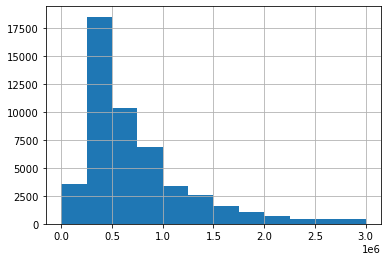

In [37]:
df['preco'].hist(bins=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000, 2750000, 3000000])

In [38]:
df['preco'].nsmallest()

9521      80000.0
18585     80000.0
26146     96000.0
9525     100000.0
16519    100000.0
Name: preco, dtype: float64

In [39]:
df = df[df['preco']<3000000]

In [40]:
df.shape

(49679, 27)

<AxesSubplot:>

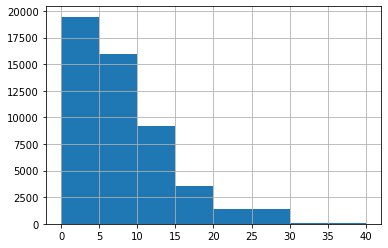

In [41]:
df['andar'].hist(bins=[0,5,10,15,20,30,40])

In [42]:
df = df[df['andar']<30]

In [43]:
df.shape

(49526, 27)

In [44]:
df = df[(df['anoConstrucao']<=2022) | (df['anoConstrucao']>1900)]

In [45]:
df.shape

(49526, 27)

In [46]:
df = df[df['valor_condominio'] <= 10000]

In [47]:
df = df[df['menorDistanciaMetro'] <= 20000]

In [48]:
df = df[df['vagasGaragem'] < 6]

In [49]:
df['anoConstrucao'] = df['anoConstrucao'].astype('int64')

In [50]:
df.shape

(49476, 27)

In [51]:
df['status'].unique()

array(['FOR_SALE', 'SOLD'], dtype=object)

In [52]:
df['motivoDespublicacao'].unique()

array([nan, 'UNIT_RENTED', 'INTERNAL_ERROR_OR_TEST', 'UNIT_SOLD',
       'GAVE_UP_ON_SELLING', 'AWAITING_BOOKKEEPING_1P', 'PERSONAL_REASON',
       'OTHER', 'FRAUD', 'UNIT_IN_NEGOTIATION',
       'UNIT_UNAVAILABLE_FOR_SALE', 'UNDER_CONSTRUCTION_1P',
       'OWNER_DISSATISFIED', 'LEGAL_PROBLEMS',
       'UNAVAILABILITY_TO_RECEIVE_VISITS',
       'UNIT_DOESNT_MEET_PUBLICATION_CRITERIA', 'LEGAL_PROBLEMS_1P',
       'REQUESTED_AFTER_SOLD_THROUGH_LOFT', 'GATEBLOCK_1P',
       'REAL_ESTATE_WITH_EXCLUSIVITY_1P', 'TRADE_DEAL_ALMOST_CLOSED_1P'],
      dtype=object)

In [53]:
df['motivoDespublicacao'].value_counts()

UNIT_SOLD                                10089
GAVE_UP_ON_SELLING                        3218
UNIT_IN_NEGOTIATION                       3143
UNIT_UNAVAILABLE_FOR_SALE                 2407
UNIT_RENTED                               2111
PERSONAL_REASON                            798
OTHER                                      653
OWNER_DISSATISFIED                         626
FRAUD                                      558
UNAVAILABILITY_TO_RECEIVE_VISITS           392
LEGAL_PROBLEMS                             339
INTERNAL_ERROR_OR_TEST                     320
UNIT_DOESNT_MEET_PUBLICATION_CRITERIA      114
AWAITING_BOOKKEEPING_1P                     88
UNDER_CONSTRUCTION_1P                       22
REQUESTED_AFTER_SOLD_THROUGH_LOFT           10
TRADE_DEAL_ALMOST_CLOSED_1P                 10
LEGAL_PROBLEMS_1P                            4
GATEBLOCK_1P                                 4
REAL_ESTATE_WITH_EXCLUSIVITY_1P              3
Name: motivoDespublicacao, dtype: int64

In [54]:
df[['criadoEm','despublicadoEm','vendidoEm']] = df[['criadoEm','despublicadoEm','vendidoEm']].apply(pd.to_datetime)

In [55]:
prazoVenda1 = 30
prazoVenda2 = 60
prazoVenda3 = 90
prazoVenda4 = 120

df['prazoVenda1'] = df['criadoEm'] + pd.DateOffset(days=prazoVenda1)
df['prazoVenda2'] = df['criadoEm'] + pd.DateOffset(days=prazoVenda2)
df['prazoVenda3'] = df['criadoEm'] + pd.DateOffset(days=prazoVenda3)
df['prazoVenda4'] = df['criadoEm'] + pd.DateOffset(days=prazoVenda4)


In [56]:
df[['criadoEm','prazoVenda1']].head()

,criadoEm,prazoVenda1
0,2021-05-22 01:15:03+00:00,2021-06-21 01:15:03+00:00
2,2021-12-30 00:26:11+00:00,2022-01-29 00:26:11+00:00
3,2021-07-27 23:30:43+00:00,2021-08-26 23:30:43+00:00
4,2021-06-28 15:22:20+00:00,2021-07-28 15:22:20+00:00
5,2021-01-08 21:11:52+00:00,2021-02-07 21:11:52+00:00


In [57]:
max(df['criadoEm']),max(df['despublicadoEm'][df['despublicadoEm'].notnull()]),max(df['vendidoEm'][df['vendidoEm'].notnull()])

(Timestamp('2022-03-30 00:28:53+0000', tz='UTC'),
 Timestamp('2022-07-12 19:01:53+0000', tz='UTC'),
 Timestamp('2022-07-12 14:48:51+0000', tz='UTC'))

In [58]:
dataReferencia = max(df['criadoEm'])
dataCorte1 = pd.to_datetime(dataReferencia) - pd.DateOffset(days=prazoVenda1)
dataCorte2 = pd.to_datetime(dataReferencia) - pd.DateOffset(days=prazoVenda2)
dataCorte3 = pd.to_datetime(dataReferencia) - pd.DateOffset(days=prazoVenda3)
dataCorte4 = pd.to_datetime(dataReferencia) - pd.DateOffset(days=prazoVenda4)

In [59]:
df1 = df[df['criadoEm'] < dataCorte1]
df2 = df[df['criadoEm'] < dataCorte2]
df3 = df[df['criadoEm'] < dataCorte3]
df4 = df[df['criadoEm'] < dataCorte4]

In [60]:
df1['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'UNIT_SOLD') and x['vendidoEm'] <= x['prazoVenda1'] else 'excluir', axis=1)
df2['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'UNIT_SOLD') and x['vendidoEm'] <= x['prazoVenda2'] else 'excluir', axis=1)
df3['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'UNIT_SOLD') and x['vendidoEm'] <= x['prazoVenda3'] else 'excluir', axis=1)
df4['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'UNIT_SOLD') and x['vendidoEm'] <= x['prazoVenda4'] else 'excluir', axis=1)

C:\Users\thais\AppData\Local\Temp\ipykernel_34296\3017376765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'UNIT_SOLD') and x['vendidoEm'] <= x['prazoVenda1'] else 'excluir', axis=1)
C:\Users\thais\AppData\Local\Temp\ipykernel_34296\3017376765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['situacao'] = df.apply(lambda x: 'vendido' if (x['status'] == 'SOLD' or x['motivoDespublicacao'] == 'U

In [61]:
df1['situacao'].value_counts(), df2['situacao'].value_counts(),df3['situacao'].value_counts(),df4['situacao'].value_counts()

(excluir    44832
 vendido     1041
 Name: situacao, dtype: int64,
 excluir    38899
 vendido     2324
 Name: situacao, dtype: int64,
 excluir    34586
 vendido     3309
 Name: situacao, dtype: int64,
 excluir    30470
 vendido     4032
 Name: situacao, dtype: int64)

In [62]:
df1 = df1[df1.situacao != 'excluir']
df2 = df2[df2.situacao != 'excluir']
df3 = df3[df3.situacao != 'excluir']
df4 = df4[df4.situacao != 'excluir']

In [63]:
df1['situacao'].value_counts(), df2['situacao'].value_counts(),df3['situacao'].value_counts(),df4['situacao'].value_counts()

(vendido    1041
 Name: situacao, dtype: int64,
 vendido    2324
 Name: situacao, dtype: int64,
 vendido    3309
 Name: situacao, dtype: int64,
 vendido    4032
 Name: situacao, dtype: int64)

In [64]:
df.head()

,id,area,preco,quartos,vagasGaragem,vistaSalaBloqueada,andar,anoConstrucao,valor_condominio,menorDistanciaMetro,...,qualidade,angulo,bagunca,conservacao,temBanheiro,temCozinha,prazoVenda1,prazoVenda2,prazoVenda3,prazoVenda4
0,123izj4,179,1650000.0,3,1,False,2,1962,2200.0,133.000,...,Boa,Bom,Nenhuma,Muito Bom,True,True,2021-06-21 01:15:03+00:00,2021-07-21 01:15:03+00:00,2021-08-20 01:15:03+00:00,2021-09-19 01:15:03+00:00
2,k8oj6e,49,650000.0,1,1,False,1,2003,1056.0,299.000,...,Boa,Bom,Nenhuma,Muito Bom,True,True,2022-01-29 00:26:11+00:00,2022-02-28 00:26:11+00:00,2022-03-30 00:26:11+00:00,2022-04-29 00:26:11+00:00
3,58un1p,69,730000.0,2,0,False,1,1971,775.0,255.000,...,Boa,Bom,Nenhuma,Ruim,True,True,2021-08-26 23:30:43+00:00,2021-09-25 23:30:43+00:00,2021-10-25 23:30:43+00:00,2021-11-24 23:30:43+00:00
4,1f0nnep,120,1399000.0,3,1,False,9,1976,1530.0,264.000,...,Boa,Bom,Nenhuma,Ruim,True,True,2021-07-28 15:22:20+00:00,2021-08-27 15:22:20+00:00,2021-09-26 15:22:20+00:00,2021-10-26 15:22:20+00:00
5,1ojs3mx,117,1100000.0,3,1,False,9,1971,1165.0,160.152,...,Boa,Bom,Nenhuma,Muito Bom,False,True,2021-02-07 21:11:52+00:00,2021-03-09 21:11:52+00:00,2021-04-08 21:11:52+00:00,2021-05-08 21:11:52+00:00


In [65]:
df.columns

Index(['id', 'area', 'preco', 'quartos', 'vagasGaragem', 'vistaSalaBloqueada',
       'andar', 'anoConstrucao', 'valor_condominio', 'menorDistanciaMetro',
       'criadoEm', 'status', 'publicado', 'despublicadoEm',
       'motivoDespublicacao', 'vendidoEm', 'regiao', 'idPredio',
       'idApartamento', 'latitude', 'longitude', 'qualidade', 'angulo',
       'bagunca', 'conservacao', 'temBanheiro', 'temCozinha', 'prazoVenda1',
       'prazoVenda2', 'prazoVenda3', 'prazoVenda4'],
      dtype='object')

In [79]:
yPreco1 = df1['preco'].reset_index(drop=True)
XPreco1 = df1[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude','anoConstrucao', 'regiao', 'qualidade', 'angulo', 'bagunca', 
                               'conservacao', 'temBanheiro', 'temCozinha','vistaSalaBloqueada']].reset_index(drop=True)
yPreco2 = df2['preco'].reset_index(drop=True)
XPreco2 = df2[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude','anoConstrucao', 'regiao', 'qualidade', 'angulo', 'bagunca', 
                               'conservacao', 'temBanheiro', 'temCozinha','vistaSalaBloqueada']].reset_index(drop=True)
yPreco3 = df3['preco'].reset_index(drop=True)
XPreco3 = df3[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude','anoConstrucao', 'regiao', 'qualidade', 'angulo', 'bagunca', 
                               'conservacao', 'temBanheiro', 'temCozinha','vistaSalaBloqueada']].reset_index(drop=True)
yPreco4 = df4['preco'].reset_index(drop=True)
XPreco4 = df4[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude','anoConstrucao', 'regiao', 'qualidade', 'angulo', 'bagunca', 
                               'conservacao', 'temBanheiro', 'temCozinha','vistaSalaBloqueada']].reset_index(drop=True)

In [80]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
auxXPreco1 = pd.DataFrame(mms.fit_transform(df1[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]))
auxXPreco2 = pd.DataFrame(mms.fit_transform(df2[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]))
auxXPreco3 = pd.DataFrame(mms.fit_transform(df3[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]))
auxXPreco4 = pd.DataFrame(mms.fit_transform(df4[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]))

In [81]:
auxXPreco1.columns = ['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']
auxXPreco2.columns = ['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']
auxXPreco3.columns = ['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']
auxXPreco4.columns = ['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']

In [82]:
XPreco1[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
        'latitude', 'longitude']] = auxXPreco1[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]
XPreco2[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
        'latitude', 'longitude']] = auxXPreco2[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]
XPreco3[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
        'latitude', 'longitude']] = auxXPreco3[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]
XPreco4[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
        'latitude', 'longitude']] = auxXPreco4[['area', 'quartos', 'vagasGaragem', 'andar', 'valor_condominio', 'menorDistanciaMetro',
                               'latitude', 'longitude']]

In [83]:
XPreco1[['anoConstrucao','temBanheiro','temCozinha']] = XPreco1[['anoConstrucao','temBanheiro','temCozinha']].astype(str)
XPreco2[['anoConstrucao','temBanheiro','temCozinha']] = XPreco2[['anoConstrucao','temBanheiro','temCozinha']].astype(str)
XPreco3[['anoConstrucao','temBanheiro','temCozinha']] = XPreco3[['anoConstrucao','temBanheiro','temCozinha']].astype(str)
XPreco4[['anoConstrucao','temBanheiro','temCozinha']] = XPreco4[['anoConstrucao','temBanheiro','temCozinha']].astype(str)

In [84]:
XPreco1 = pd.get_dummies(XPreco1)
XPreco2 = pd.get_dummies(XPreco2)
XPreco3 = pd.get_dummies(XPreco3)
XPreco4 = pd.get_dummies(XPreco4)

In [88]:
from sklearn.model_selection import train_test_split
XPreco1_treino, XPreco1_teste,yPreco1_treino,yPreco1_teste = train_test_split(XPreco1,yPreco1,test_size=0.2, random_state=42)
XPreco2_treino, XPreco2_teste,yPreco2_treino,yPreco2_teste = train_test_split(XPreco2,yPreco2,test_size=0.2, random_state=42)
XPreco3_treino, XPreco3_teste,yPreco3_treino,yPreco3_teste = train_test_split(XPreco3,yPreco3,test_size=0.2, random_state=42)
XPreco4_treino, XPreco4_teste,yPreco4_treino,yPreco4_teste = train_test_split(XPreco4,yPreco4,test_size=0.2, random_state=42)


In [90]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [91]:
#Reinslatando o Catboost
!pip install catboost

In [92]:
from catboost import CatBoostRegressor
modeloPreco1CB = CatBoostRegressor(iterations=1000,random_state=42)
modeloPreco1CB.fit(XPreco1_treino, yPreco1_treino)
modeloPreco2CB = CatBoostRegressor(iterations=1000,random_state=42)
modeloPreco2CB.fit(XPreco2_treino, yPreco2_treino)
modeloPreco3CB = CatBoostRegressor(iterations=1000,random_state=42)
modeloPreco3CB.fit(XPreco3_treino, yPreco3_treino)
modeloPreco4CB = CatBoostRegressor(iterations=1000,random_state=42)
modeloPreco4CB.fit(XPreco4_treino, yPreco4_treino)

Learning rate set to 0.03977
0:	learn: 432382.9115539	total: 153ms	remaining: 2m 33s
1:	learn: 422211.4162920	total: 157ms	remaining: 1m 18s
2:	learn: 412657.5039498	total: 162ms	remaining: 53.7s
3:	learn: 403592.5746338	total: 166ms	remaining: 41.3s
4:	learn: 394727.2043775	total: 168ms	remaining: 33.4s
5:	learn: 385502.7571487	total: 171ms	remaining: 28.3s
6:	learn: 377369.6997519	total: 174ms	remaining: 24.6s
7:	learn: 370062.2831072	total: 176ms	remaining: 21.8s
8:	learn: 362468.4851942	total: 177ms	remaining: 19.5s
9:	learn: 356278.2835536	total: 180ms	remaining: 17.8s
10:	learn: 349392.5426200	total: 182ms	remaining: 16.4s
11:	learn: 342496.6953979	total: 184ms	remaining: 15.2s
12:	learn: 336267.5223723	total: 187ms	remaining: 14.2s
13:	learn: 330781.7513586	total: 189ms	remaining: 13.3s
14:	learn: 324765.3070740	total: 190ms	remaining: 12.5s
15:	learn: 319130.6392060	total: 192ms	remaining: 11.8s
16:	learn: 314280.3732507	total: 194ms	remaining: 11.2s
17:	learn: 308980.9069910	t

In [93]:
y_pred_Preco1CB = modeloPreco1CB.predict(XPreco1_teste)
print('Prazo1: ','MSE: ',mean_squared_error(yPreco1_teste, y_pred_Preco1CB), 'MAE: ',mean_absolute_error(yPreco1_teste,y_pred_Preco1CB),'MAPE: ',mean_absolute_percentage_error(yPreco1_teste,y_pred_Preco1CB),'R2: ',r2_score(yPreco1_teste, y_pred_Preco1CB))
y_pred_Preco2CB = modeloPreco2CB.predict(XPreco2_teste)
print('Prazo2: ','MSE: ',mean_squared_error(yPreco2_teste, y_pred_Preco2CB), 'MAE: ',mean_absolute_error(yPreco2_teste,y_pred_Preco2CB),'MAPE: ',mean_absolute_percentage_error(yPreco2_teste,y_pred_Preco2CB),'R2: ',r2_score(yPreco2_teste, y_pred_Preco2CB))
y_pred_Preco3CB = modeloPreco3CB.predict(XPreco3_teste)
print('Prazo3: ','MSE: ',mean_squared_error(yPreco3_teste, y_pred_Preco3CB), 'MAE: ',mean_absolute_error(yPreco3_teste,y_pred_Preco3CB),'MAPE: ',mean_absolute_percentage_error(yPreco3_teste,y_pred_Preco3CB),'R2: ',r2_score(yPreco3_teste, y_pred_Preco3CB))
y_pred_Preco4CB = modeloPreco4CB.predict(XPreco4_teste)
print('Prazo4: ','MSE: ',mean_squared_error(yPreco4_teste, y_pred_Preco4CB), 'MAE: ',mean_absolute_error(yPreco4_teste,y_pred_Preco4CB),'MAPE: ',mean_absolute_percentage_error(yPreco4_teste,y_pred_Preco4CB),'R2: ',r2_score(yPreco4_teste, y_pred_Preco4CB))

Prazo1:  MSE:  26492777961.104797 MAE:  104634.50824878705 MAPE:  0.17378331593780724 R2:  0.856405978253457
Prazo2:  MSE:  29292462242.522068 MAE:  110225.78054533813 MAPE:  0.166709144389166 R2:  0.8530573086447641
Prazo3:  MSE:  20508781319.43289 MAE:  92911.03032353608 MAPE:  0.1410526893728858 R2:  0.9065290356566327
Prazo4:  MSE:  23612043813.405518 MAE:  97726.58994461066 MAPE:  0.1503998705638677 R2:  0.8900864885401218


In [94]:
pd.DataFrame(np.array(modeloPreco1CB.get_feature_importance(prettified=True))).head(50)

,0,1
0,area,38.130051
1,valor_condominio,16.165235
2,longitude,8.923979
3,menorDistanciaMetro,6.351034
4,vagasGaragem,6.129025
5,latitude,5.738539
6,andar,3.495679
7,quartos,1.807663
8,regiao_Sp Morumbi,1.373538
9,conservacao_Ruim,1.354022
